# Importing Libraries

In [1]:
# These libraries are for mathematical caluclations and data manipulation

import pandas as pd
import numpy as np

# Data Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

# Predictive Analysis / Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# DATA EXPLORATION

### Week 1

#### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

**• Glucose**

**• BloodPressure**

**• SkinThickness**

**• Insulin**

**• BMI**

In [2]:
df_health = pd.read_csv('health care diabetes.csv')

In [3]:
df_health.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_health.shape

(768, 9)

In [5]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_health.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df_health.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Above analysis shows no null values however, as stated in the problemt statement a value of **zero** will be considered missing value for columns **Glucose, Blood Pressure, Skin Thickness, Insulin and BMI.**

Therefore, let's find how many values are 0 in above to treat them as missing values.

In [8]:
df_health.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
zero_rows_count = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']  # replace with your column names

for column in zero_rows_count:
    zero_rows = df_health[df_health[column] == 0]
    print(f"Number of rows with zero in '{column}': {len(zero_rows)}")

Number of rows with zero in 'Glucose': 5
Number of rows with zero in 'BloodPressure': 35
Number of rows with zero in 'SkinThickness': 227
Number of rows with zero in 'Insulin': 374
Number of rows with zero in 'BMI': 11


Checking now if the above variables are continuous or discrete:

In [10]:
for column_name in zero_rows_count:
    column = df_health[column_name]
    if np.issubdtype(column.dtype, np.number):
        # If the column is numeric, check if it's discrete or continuous
        if column.eq(column.astype(int)).all():
            print(f"'{column.name}' is a discrete variable.")
        else:
            print(f"'{column.name}' is a continuous variable.")
    else:
        print(f"'{column.name}' is not a numeric variable.")

'Glucose' is a discrete variable.
'BloodPressure' is a discrete variable.
'SkinThickness' is a discrete variable.
'Insulin' is a discrete variable.
'BMI' is a continuous variable.


#### 2. Visually explore these variables using histograms. Treat the missing values accordingly.

In [11]:
def plot_histograms(df_health, columns, bins=20, color="teal", edgecolor="black"):
    # Create a figure
    plt.figure(figsize=(10, 10))
    plt.suptitle("Histograms of variables")

    # Loop over the columns
    for i, column in enumerate(columns):
        # Create a subplot
        plt.subplot(len(columns), 1, i+1)
        # Plot the histogram
        plt.hist(df_health[column], bins=bins, color=color, edgecolor=edgecolor)
        # Add the labels
        plt.xlabel(column)
        plt.ylabel("Frequency")
        
    # Adjust the spacing
    plt.tight_layout()

    # Return or show the figure
    plt.show()

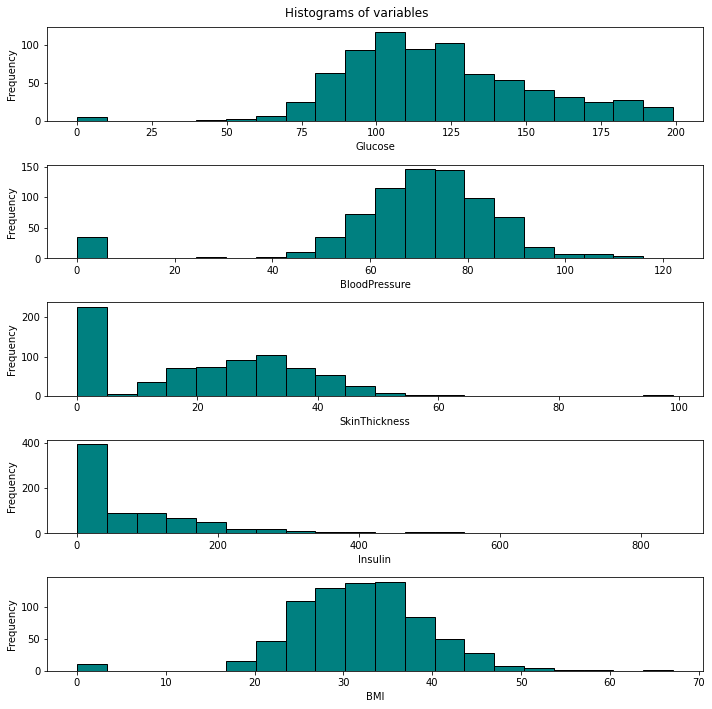

In [12]:
plot_histograms(df_health, zero_rows_count)

From above histograms and skew values, current distribution is right skewed for SkinThickness and Insulin while for others it appears balanced with some outliers. Now, we will treat the missing values to better visualize the association of these variables with outcomes.

We will clean up the rows for glucose, blood pressure and bmi as they are low in count. For remaining 2 variables (Skin Thickness and Insulin), we will go with median substituion since it is independent of skewness.

In [13]:
df_health = df_health.loc[df_health['Glucose'] != 0]
df_health = df_health.loc[df_health['BMI'] != 0]
df_health = df_health.loc[df_health['BloodPressure'] != 0]

In [14]:
df_health.shape

(724, 9)

In [15]:
# Analysing the stats of data after removing glucose, bmi and Bloodpressure columns
df_health.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,21.443370,15.732756,0.000,0.000,24.000,33.0000,99.00
Insulin,724.0,84.494475,117.016513,0.000,0.000,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


In [16]:
df_health[zero_rows_count] = df_health[zero_rows_count].replace(0, np.NaN)
df_health.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness                True
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
df_health['Insulin'] = df_health['Insulin'].fillna(df_health['Insulin'].median())
df_health['SkinThickness'] = df_health['SkinThickness'].fillna(df_health['SkinThickness'].median())

In [18]:
df_health.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                46
SkinThickness                50
Insulin                     185
BMI                         245
DiabetesPedigreeFunction    499
Age                          51
Outcome                       2
dtype: int64

#### 3.Create a count (frequency) plot describing the data types and the count of variables.

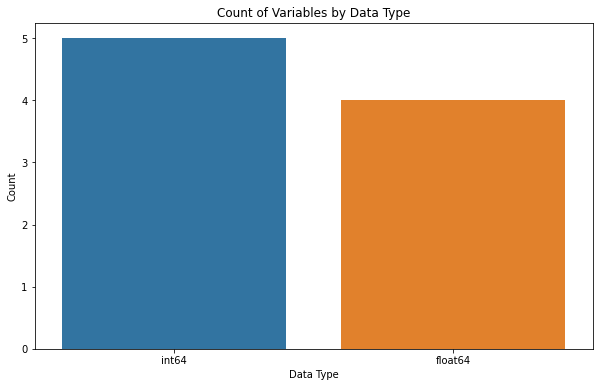

In [19]:
# Count the frequency of each data type
type_counts = df_health.dtypes.value_counts()

# Convert the Series to a DataFrame to plot
type_counts_df = pd.DataFrame({'data_type': type_counts.index, 'count': type_counts.values})

# Create the count plot
plt.figure(figsize=(10, 6))
sns.barplot(data=type_counts_df, x='data_type', y='count')
plt.title('Count of Variables by Data Type')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()


### Week 2

#### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

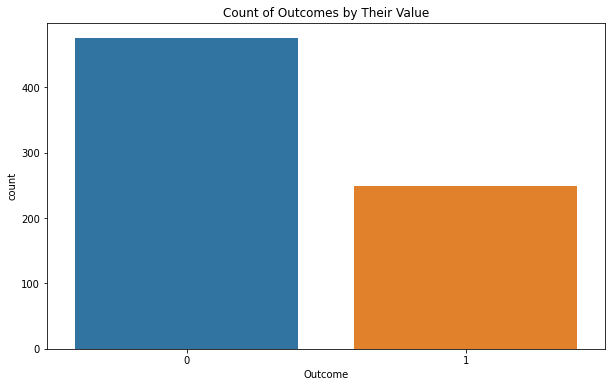

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outcome', data=df_health)
plt.title('Count of Outcomes by Their Value')
plt.show()

The dataset is imablanaced as only 35% of the outcomes are positive. This can lead to creation of a biased model. Therefore, we will have to opt for sampling methods that can help us reduce possibilities of overfitting and undersampling. I will choose to run differenet evaluation metrics such as precision, recall (sensitivity), f1 score and AUC-ROC along with accuracy to get a more comprehensive view of my model.

#### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

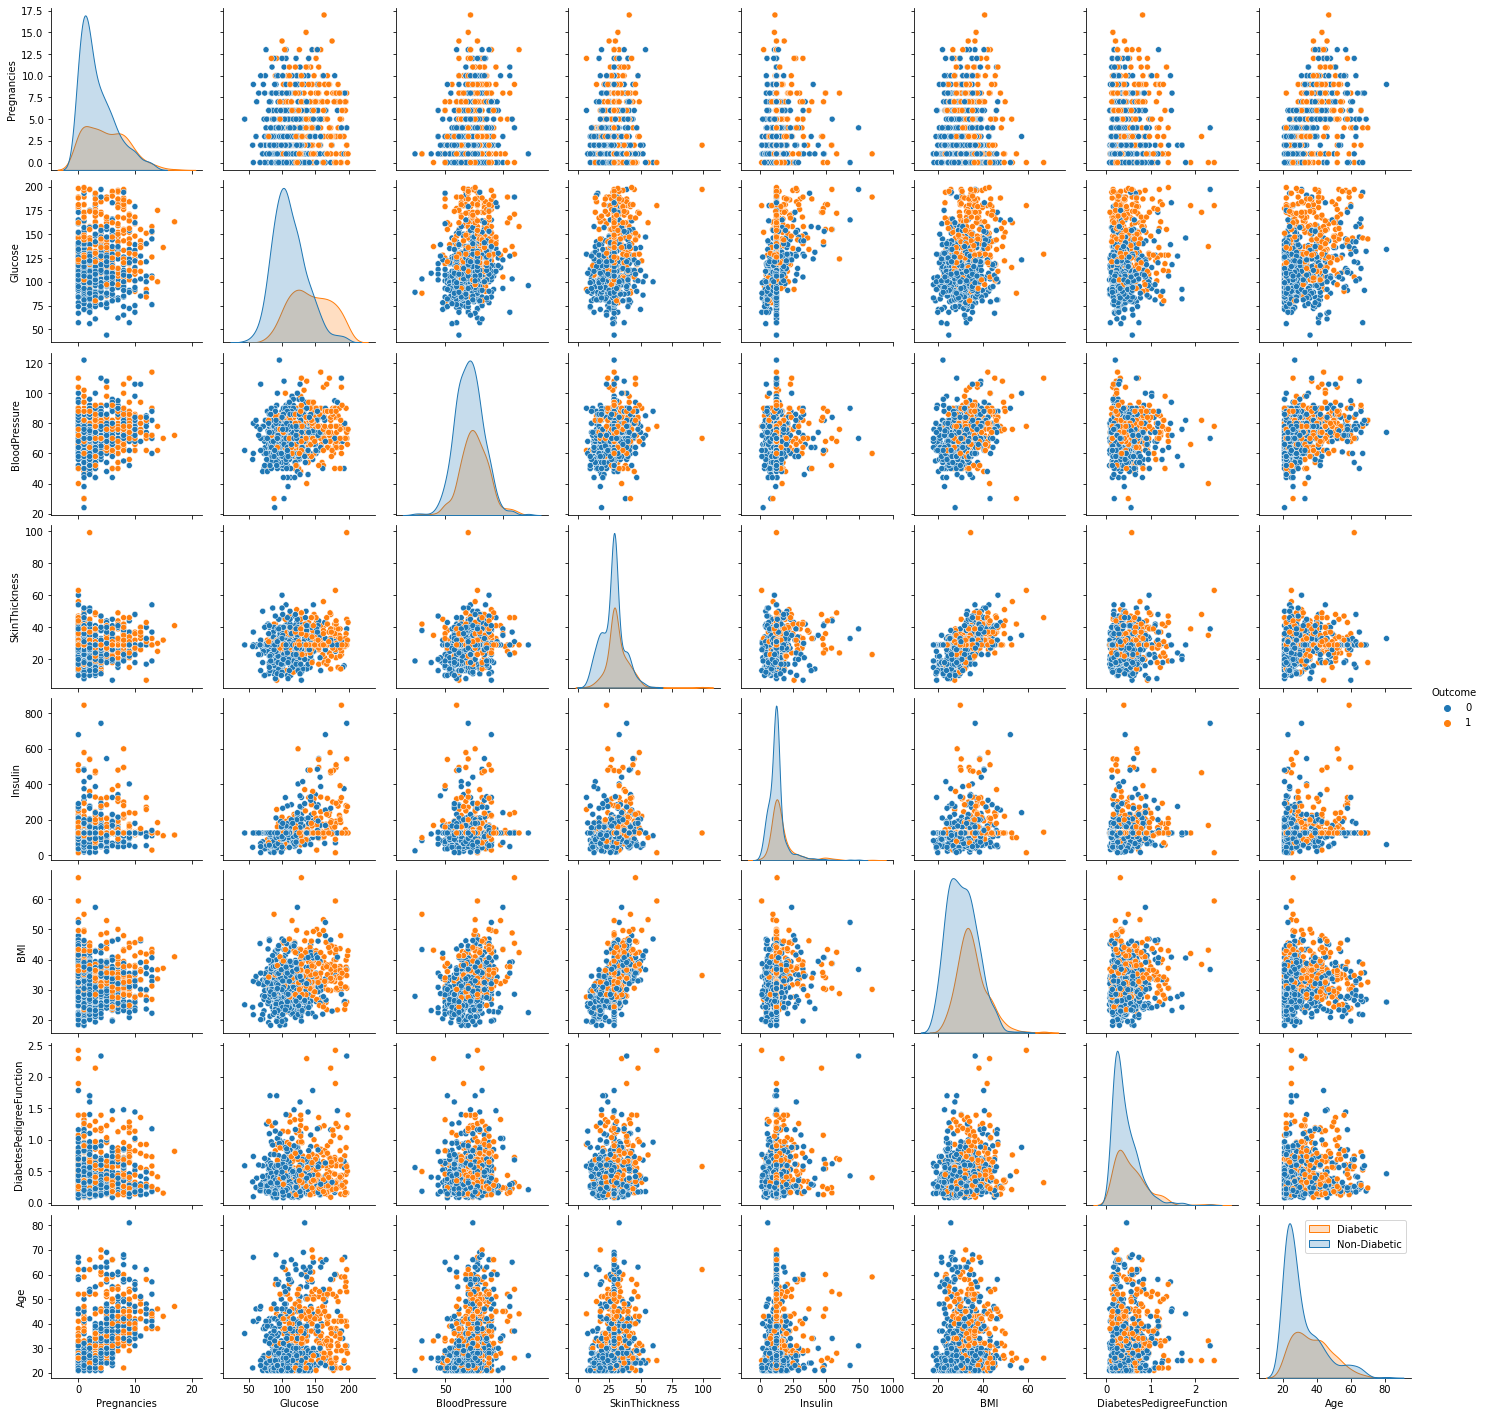

In [21]:
sns.pairplot(df_health, hue='Outcome')
plt.legend(loc = 'upper right', labels = ['Diabetic','Non-Diabetic'])

Factors such as glucose and BMI seem to be most important.
Being diabetic is predicted for someone who has glucose > 130, BMI > 30, Insulin > 100, 
However, none seem to be working independently and will require an analysis to understand their interdependencies further.

#### 3. Perform correlation analysis. Visually explore it using a heat map.

In [22]:
health_corr = df_health.corr()
health_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.078710,0.023269,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.195340,0.427117,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.191570,0.045832,0.287403,-0.000075,0.324897,0.166703
SkinThickness,0.078710,0.195340,0.191570,1.000000,0.154145,0.555098,0.106670,0.124268,0.216357
Insulin,0.023269,0.427117,0.045832,0.154145,1.000000,0.184102,0.129494,0.096894,0.211736
BMI,0.012342,0.223276,0.287403,0.555098,0.184102,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.106670,0.129494,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.124268,0.096894,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.216357,0.211736,0.299375,0.184947,0.245741,1.000000


<AxesSubplot: >

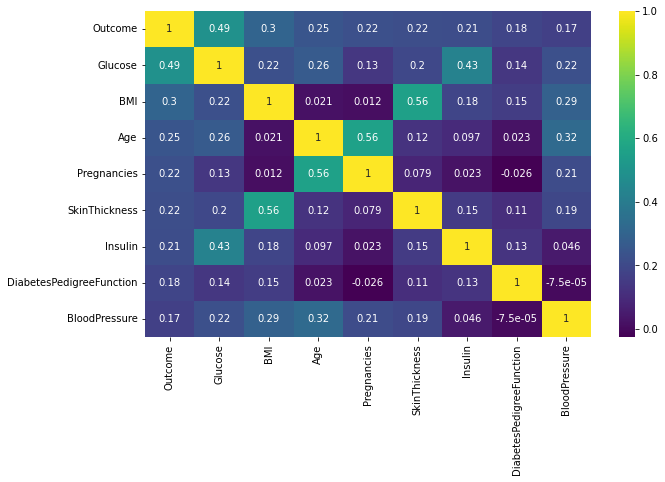

In [23]:
#outcome correlation matrix
k = 10  #number of variables for heatmap
cols = health_corr.nlargest(k, 'Outcome')['Outcome'].index
cm = df_health[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

**The first row of heatmap shows impact of each variable on the outcome with glucose having the highest of 0.49 and BloodPressure lowest of 0.17.**

In [24]:
health_corr.to_csv('correlation matrix.csv')

### Week 2

#### Data Modelling
1.Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2.Apply an appropriate classification algorithm to build a model.

3.Compare various models with the results from KNN algorithm.

4.Create a classification report by analyzing sensitivity, specificity,
AUC (ROC curve), etc.Please be descriptive to explain what values of these parameter you have used.

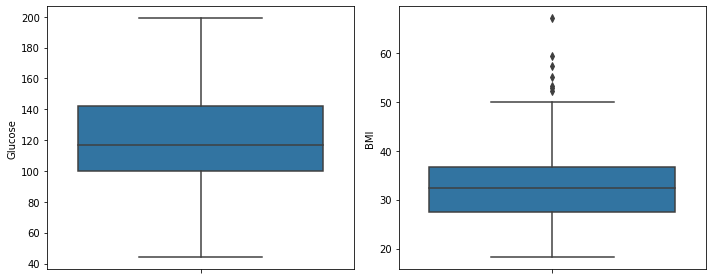

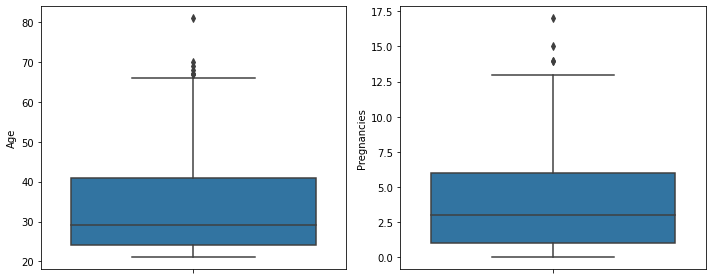

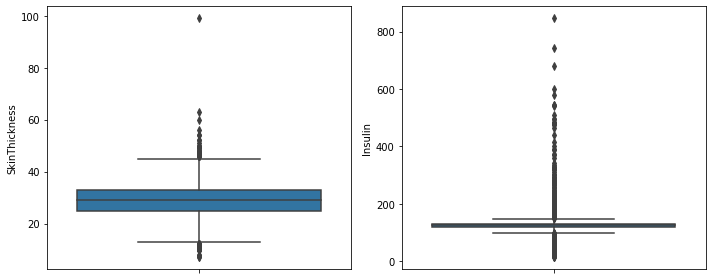

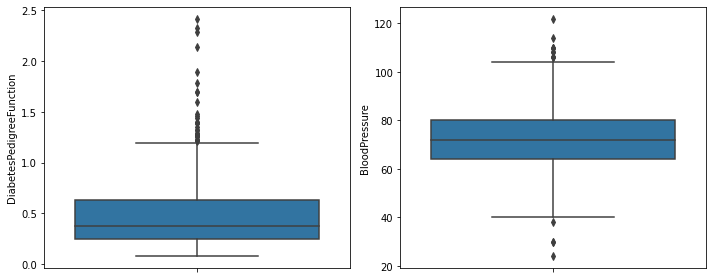

In [25]:
num_cols = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction','BloodPressure']

facet = None

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(x=facet, y=num_cols[i],data = df_health)
        plt.subplot(122)            
        sns.boxplot(x=facet, y=num_cols[i+1],data = df_health)
        plt.tight_layout()
        plt.show()

Above boxplots show the outliers for each variable which aren't too many to negatively impact our data. Plus removing outlier can further reduce number of actual positives hence, further broadening the imabalnce. However, in ideal scenario, it will be best to remove the outliers.

KNN Model will be created first since all models need to be compared with this. And since this is a classification problem, we will be starting with basic Logistic Regression model and this will be followed by creation of other models such as random forest and some ensemble learning models. We will then compare these results based on metrics such as precsion, accuracy, etc to see which model performs the most accurate predictions.

We will first split the data into test and train before creating models and predictions. Eventhough, the data is imbalanced, we are not directly applying SMOTE techinque and will start first with normal sampling.

In [26]:
X = df_health.drop('Outcome', axis=1)
y = df_health['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=12)

In [27]:
X_train.shape, X_test.shape

((579, 8), (145, 8))

In [28]:
y_train.shape, y_test.shape

((579,), (145,))

##### 1. KNN

In [29]:
# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels of the test and train set
y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [31]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_pred))

0.846286701208981
0.7655172413793103


In [32]:
print('Train', classification_report(y_train, y_train_pred))
print('Test',classification_report(y_test, y_pred))

Train               precision    recall  f1-score   support

           0       0.87      0.90      0.88       380
           1       0.79      0.75      0.77       199

    accuracy                           0.85       579
   macro avg       0.83      0.82      0.83       579
weighted avg       0.84      0.85      0.85       579

Test               precision    recall  f1-score   support

           0       0.81      0.83      0.82        95
           1       0.67      0.64      0.65        50

    accuracy                           0.77       145
   macro avg       0.74      0.74      0.74       145
weighted avg       0.76      0.77      0.76       145



<AxesSubplot: >

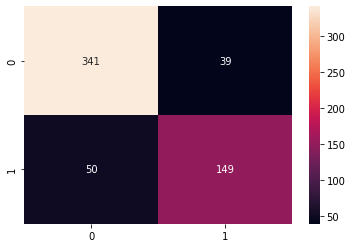

In [33]:
# Confusion metrics for train and test datas
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = 'g')

<AxesSubplot: >

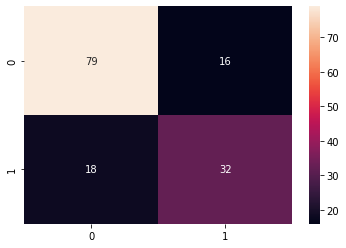

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'g')

AUC:0.805


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

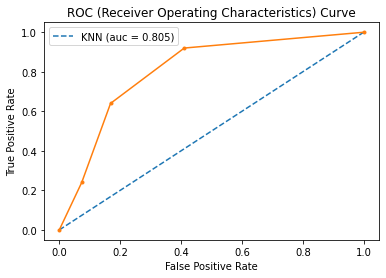

In [35]:
probs_knn = knn.predict_proba(X_test) 
probs_knn = probs_knn[:, 1]
auc_knn = roc_auc_score(y_test, probs_knn) 
print('AUC:%.3f' % auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs_knn)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'KNN (auc = %0.3f)'% auc_knn)
plt.plot(fpr, tpr, marker='.')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

##### 2. Logistic Regression

In [36]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=300)

# Fit the model on the training data and find the score
log_reg.fit(X_train, y_train)
log_reg.score(X_train,y_train) # accuracy score

0.7737478411053541

In [37]:
# Use the model to make predictions on the test data
lr_pred = log_reg.predict(X_test)
lr_train_pred = log_reg.predict(X_train)

print(accuracy_score(y_train, lr_train_pred))
print(accuracy_score(y_test, lr_pred))

0.7737478411053541
0.8


In [38]:
print('Train', classification_report(y_train, lr_train_pred))
print('Test',classification_report(y_test, lr_pred))

Train               precision    recall  f1-score   support

           0       0.79      0.89      0.84       380
           1       0.72      0.56      0.63       199

    accuracy                           0.77       579
   macro avg       0.76      0.72      0.73       579
weighted avg       0.77      0.77      0.77       579

Test               precision    recall  f1-score   support

           0       0.84      0.86      0.85        95
           1       0.72      0.68      0.70        50

    accuracy                           0.80       145
   macro avg       0.78      0.77      0.78       145
weighted avg       0.80      0.80      0.80       145



<AxesSubplot: >

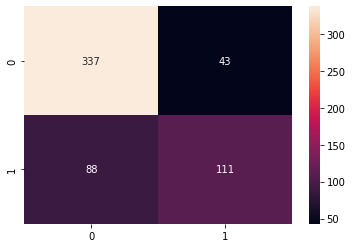

In [39]:
# Confusion metrics for train and test datas
sns.heatmap(confusion_matrix(y_train, lr_train_pred), annot = True, fmt = 'g')

<AxesSubplot: >

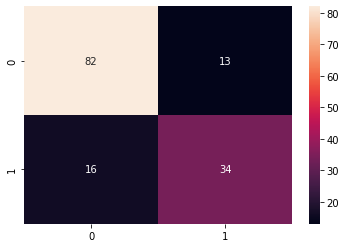

In [40]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot = True, fmt = 'g')

AUC:0.882


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

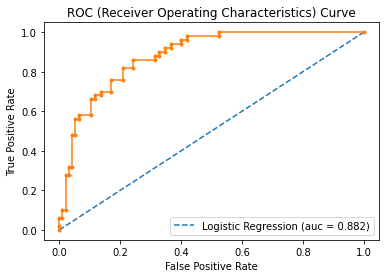

In [41]:
probs_log = log_reg.predict_proba(X_test)
probs_log = probs_log[:, 1]
auc_log = roc_auc_score(y_test, probs_log)
print('AUC:%.3f' %auc_log)
fpr, tpr, thresholds = roc_curve(y_test, probs_log)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Logistic Regression (auc = %0.3f)' % auc_log)
plt.plot(fpr, tpr, marker='.')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

##### 3. SVM

In [42]:
# Create a SVM classifier
clf = SVC(kernel='rbf',probability=True) # You can change the kernel as needed

# Train the model
clf.fit(X_train, y_train)

# Predict the response for the test dataset
svm_pred = clf.predict(X_test)
svm_train_pred = clf.predict(X_train)

print(accuracy_score(y_train, svm_train_pred))
print(accuracy_score(y_test, svm_pred))

0.8203799654576857
0.7931034482758621


In [43]:
print('Train', classification_report(y_train, svm_train_pred))
print('Test',classification_report(y_test, svm_pred))

Train               precision    recall  f1-score   support

           0       0.82      0.94      0.87       380
           1       0.83      0.60      0.70       199

    accuracy                           0.82       579
   macro avg       0.82      0.77      0.78       579
weighted avg       0.82      0.82      0.81       579

Test               precision    recall  f1-score   support

           0       0.82      0.87      0.85        95
           1       0.73      0.64      0.68        50

    accuracy                           0.79       145
   macro avg       0.77      0.76      0.76       145
weighted avg       0.79      0.79      0.79       145



<AxesSubplot: >

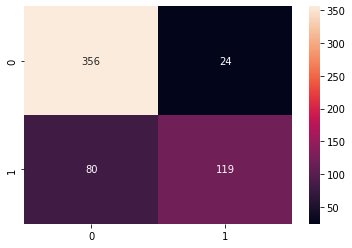

In [44]:
# Confusion metrics for train and test datas
sns.heatmap(confusion_matrix(y_train, svm_train_pred), annot = True, fmt = 'g')

<AxesSubplot: >

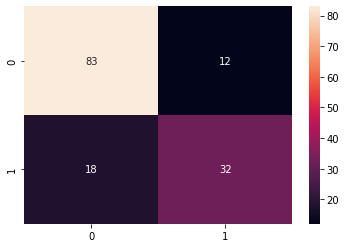

In [45]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot = True, fmt = 'g')

AUC:0.875


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

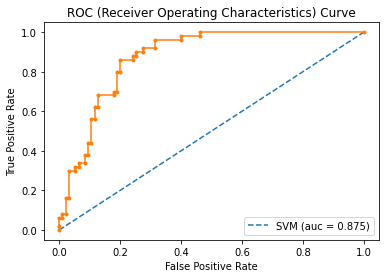

In [46]:
probs_svm = clf.predict_proba(X_test)
probs_svm = probs_svm[:, 1]
auc_svm = roc_auc_score(y_test, probs_svm)
print('AUC:%.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs_svm)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'SVM (auc = %0.3f)' % auc_svm)
plt.plot(fpr, tpr, marker='.')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

##### 4. Decision Tree

In [47]:
dectree = DecisionTreeClassifier(random_state=0,max_depth=2)
dectree = dectree.fit(X_train,y_train)

dectree_pred = clf.predict(X_test)
dectree_train_pred= clf.predict(X_train)

## getting accuracy scores

print(accuracy_score(y_train, dectree_train_pred))
print(accuracy_score(y_test, dectree_pred))

0.8203799654576857
0.7931034482758621


In [48]:
print('Train', classification_report(y_train, dectree_train_pred))
print('Test',classification_report(y_test, dectree_pred))

Train               precision    recall  f1-score   support

           0       0.82      0.94      0.87       380
           1       0.83      0.60      0.70       199

    accuracy                           0.82       579
   macro avg       0.82      0.77      0.78       579
weighted avg       0.82      0.82      0.81       579

Test               precision    recall  f1-score   support

           0       0.82      0.87      0.85        95
           1       0.73      0.64      0.68        50

    accuracy                           0.79       145
   macro avg       0.77      0.76      0.76       145
weighted avg       0.79      0.79      0.79       145



<AxesSubplot: >

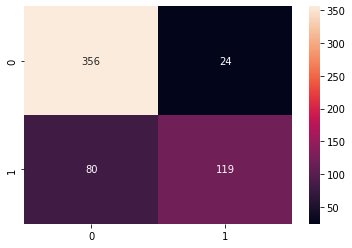

In [49]:
# Confusion metrics for train and test datas
sns.heatmap(confusion_matrix(y_train, dectree_train_pred), annot = True, fmt = 'g')

<AxesSubplot: >

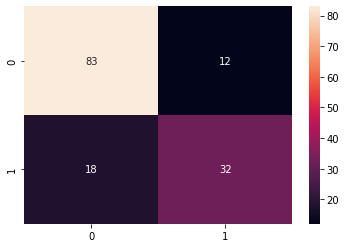

In [50]:
sns.heatmap(confusion_matrix(y_test, dectree_pred), annot = True, fmt = 'g')

AUC:0.797


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

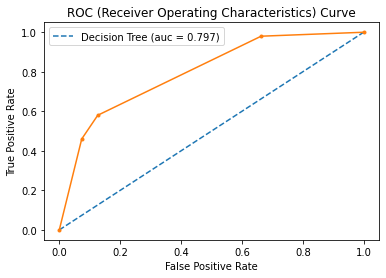

In [51]:
    probs_dt = dectree.predict_proba(X_test)
    probs_dt = probs_dt[:, 1]
    auc_dt = roc_auc_score(y_test, probs_dt)
    print('AUC:%.3f' %auc_dt)
    fpr, tpr, thresholds = roc_curve(y_test, probs_dt)
    plt.plot([0, 1], [0, 1], linestyle='--', label = 'Decision Tree (auc = %0.3f)' % auc_dt)
    plt.plot(fpr, tpr, marker='.')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC (Receiver Operating Characteristics) Curve")

##### 5. Random Forest

In [52]:
rfc = RandomForestClassifier(n_estimators=200,max_depth=4,random_state=5)
rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)
rfc_train_pred = rfc.predict(X_train)

## getting accuracy scores

print(accuracy_score(y_train, rfc_train_pred))
print(accuracy_score(y_test, rfc_pred))

0.8272884283246977
0.8068965517241379


In [53]:
print('Train', classification_report(y_train, rfc_train_pred))
print('Test',classification_report(y_test, rfc_pred))

Train               precision    recall  f1-score   support

           0       0.83      0.93      0.88       380
           1       0.83      0.63      0.71       199

    accuracy                           0.83       579
   macro avg       0.83      0.78      0.80       579
weighted avg       0.83      0.83      0.82       579

Test               precision    recall  f1-score   support

           0       0.83      0.89      0.86        95
           1       0.76      0.64      0.70        50

    accuracy                           0.81       145
   macro avg       0.79      0.77      0.78       145
weighted avg       0.80      0.81      0.80       145



<AxesSubplot: >

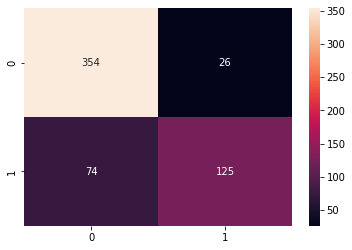

In [54]:
# Confusion metrics for train and test datas
sns.heatmap(confusion_matrix(y_train, rfc_train_pred), annot = True, fmt = 'g')

<AxesSubplot: >

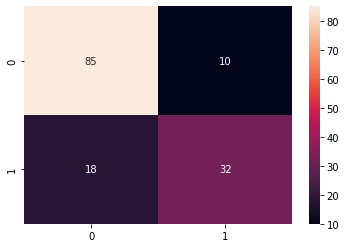

In [55]:
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True, fmt = 'g')

AUC:0.879


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

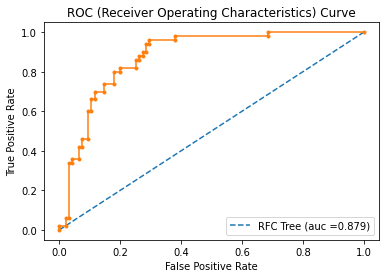

In [56]:
prob_rf = rfc.predict_proba(X_test) 
prob_rf = prob_rf[:, 1]
auc_rf = roc_auc_score(y_test, prob_rf) 
print('AUC:%.3f' % auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, prob_rf)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'RFC Tree (auc =%0.3f)' % auc_rf) 
plt.plot(fpr, tpr,marker='.')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

##### 6. Gradient Boosting Classifier

In [57]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train)

gb_pred = gb_clf.predict(X_test)
gb_train_pred = gb_clf.predict(X_train)

## getting accuracy scores

print(accuracy_score(y_train, gb_train_pred))
print(accuracy_score(y_test, gb_pred))

0.8704663212435233
0.7724137931034483


In [58]:
print('Train', classification_report(y_train, gb_train_pred))
print('Test',classification_report(y_test, gb_pred))

Train               precision    recall  f1-score   support

           0       0.88      0.93      0.90       380
           1       0.84      0.76      0.80       199

    accuracy                           0.87       579
   macro avg       0.86      0.85      0.85       579
weighted avg       0.87      0.87      0.87       579

Test               precision    recall  f1-score   support

           0       0.84      0.80      0.82        95
           1       0.65      0.72      0.69        50

    accuracy                           0.77       145
   macro avg       0.75      0.76      0.75       145
weighted avg       0.78      0.77      0.77       145



<AxesSubplot: >

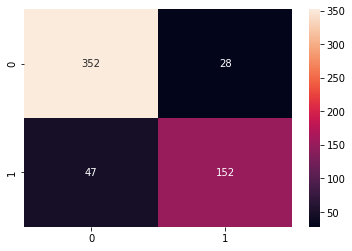

In [59]:
# Confusion metrics for train and test datas
sns.heatmap(confusion_matrix(y_train, gb_train_pred), annot = True, fmt = 'g')

<AxesSubplot: >

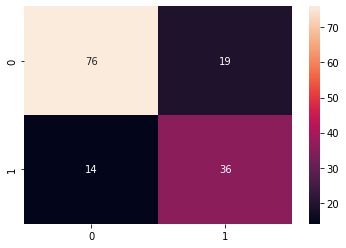

In [60]:
sns.heatmap(confusion_matrix(y_test, gb_pred), annot = True, fmt = 'g')

AUC:0.829


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

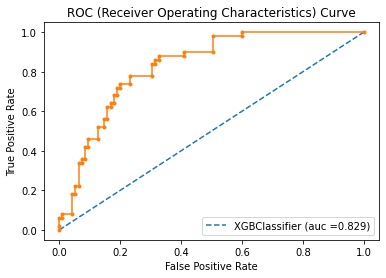

In [61]:
prob_gb = gb_clf.predict_proba(X_test) 
prob_gb = prob_gb[:, 1]
auc_gb = roc_auc_score(y_test, prob_gb) 
print('AUC:%.3f' % auc_gb)
fpr, tpr, thresholds = roc_curve(y_test, prob_gb)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'XGBClassifier (auc =%0.3f)' % auc_gb) 
plt.plot(fpr, tpr,marker='.')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

##### 7. GaussianNB

In [62]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

gnb_pred = gnb.predict(X_test)
gnb_train_pred = gnb.predict(X_train)

## getting accuracy scores

print(accuracy_score(y_train, gnb_train_pred))
print(accuracy_score(y_test, gnb_pred))

0.7443868739205527
0.8068965517241379


In [63]:
print('Train', classification_report(y_train, gnb_train_pred))
print('Test',classification_report(y_test, gnb_pred))

Train               precision    recall  f1-score   support

           0       0.79      0.83      0.81       380
           1       0.64      0.59      0.61       199

    accuracy                           0.74       579
   macro avg       0.72      0.71      0.71       579
weighted avg       0.74      0.74      0.74       579

Test               precision    recall  f1-score   support

           0       0.85      0.86      0.85        95
           1       0.73      0.70      0.71        50

    accuracy                           0.81       145
   macro avg       0.79      0.78      0.78       145
weighted avg       0.81      0.81      0.81       145



<AxesSubplot: >

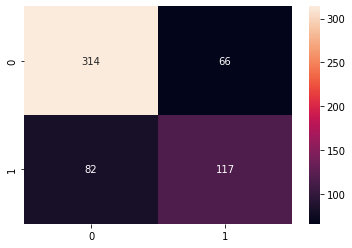

In [64]:
# Confusion metrics for train and test datas
sns.heatmap(confusion_matrix(y_train, gnb_train_pred), annot = True, fmt = 'g')

<AxesSubplot: >

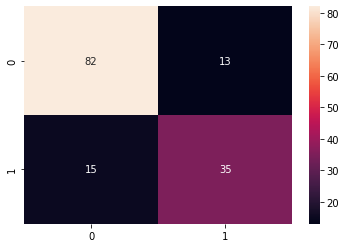

In [65]:
sns.heatmap(confusion_matrix(y_test, gnb_pred), annot = True, fmt = 'g')

AUC:0.882


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

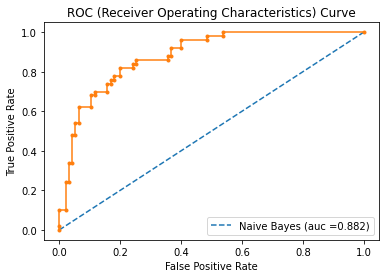

In [66]:
prob_gnb = gnb.predict_proba(X_test) 
prob_gnb = prob_gnb[:, 1]
auc_gnb = roc_auc_score(y_test, prob_gnb) 
print('AUC:%.3f' % auc_gnb)
fpr, tpr, thresholds = roc_curve(y_test, prob_gnb)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Naive Bayes (auc =%0.3f)' % auc_gnb) 
plt.plot(fpr, tpr,marker='.')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

#### Comparing models now

In [67]:
# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

models = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('Log Regression', LogisticRegression(max_iter=300)),
    ('Random Forest', RandomForestClassifier(n_estimators=200,max_depth=4,random_state=5)),
    ('SVM', SVC(kernel='rbf',probability=True)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0,max_depth=2)),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)),
    ('Gaussian NB',GaussianNB())
]
     
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the results to the DataFrame
    result = pd.DataFrame({'Model': [name],
                           'Accuracy': [accuracy],
                           'Precision': [precision],
                           'Recall': [recall],
                           'F1 Score': [f1]})
    results = pd.concat([results, result], ignore_index=True)

# Print the results
print(results)


                          Model  Accuracy  Precision  Recall  F1 Score
0                           KNN  0.765517   0.666667    0.64  0.653061
1                Log Regression  0.800000   0.723404    0.68  0.701031
2                 Random Forest  0.806897   0.761905    0.64  0.695652
3                           SVM  0.793103   0.727273    0.64  0.680851
4                 Decision Tree  0.765517   0.766667    0.46  0.575000
5  Gradient Boosting Classifier  0.772414   0.654545    0.72  0.685714
6                   Gaussian NB  0.806897   0.729167    0.70  0.714286


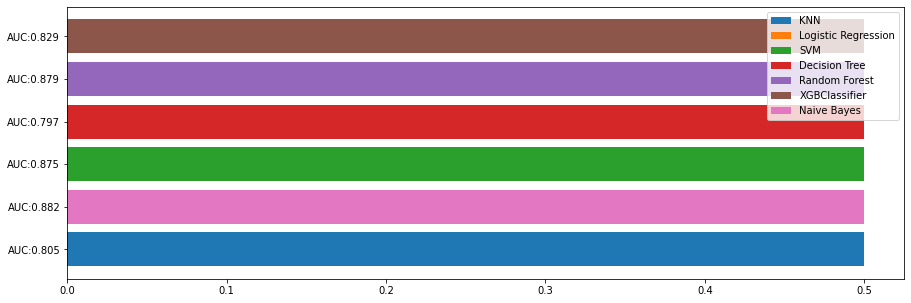

In [68]:
#Best ROC-AUC Performance

KNN = 'AUC:%.3f' % auc_knn
LogisticRegression = 'AUC:%.3f' %auc_log
SVM = 'AUC:%.3f' %auc_svm
DecisionTree = 'AUC:%.3f' %auc_dt
RandomForest = 'AUC:%.3f' % auc_rf
XGBClassifier = 'AUC:%.3f' % auc_gb
NaiveBayes = 'AUC:%.3f' % auc_gnb

plt.figure(figsize = (15,5))
plt.barh(KNN, label ='KNN', width = 0.5)
plt.barh(LogisticRegression, label = 'Logistic Regression', width = 0.5)
plt.barh(SVM, label = 'SVM', width = 0.5)
plt.barh(DecisionTree, label ='Decision Tree', width = 0.5)
plt.barh(RandomForest, label ='Random Forest', width = 0.5)
plt.barh(XGBClassifier, label ='XGBClassifier', width = 0.5)
plt.barh(NaiveBayes, label ='Naive Bayes', width = 0.5)
plt.legend()

As per above analysis, best predictions are provided by following models - random forest, SVM and Naive Bayes for this data, as compared to KNN model.

# Tableau Link

Please click below link to access my Tableau project -

https://public.tableau.com/app/profile/karni.gupta/viz/Final-Project-KarniGupta/DashboardforanalysisofhealthdatafromNIDDK?publish=yes